## News from this week at Supercomputing

### A64FX

The most energy-efficient HPL machine today is pure CPU.  It is also among the *least* "made for HPL" architectures on the list.

https://www.top500.org/green500/list/2019/11/

### DAOS filesystem performance

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">DAOS declares #1 in IO-500 on the basis of performance-per-node (Weka on AWS was absolute performance). They maxed out I/O read bandwidth of the NVDIMMs in their cluster; iops were client limited. Pretty crazy efficiency. <a href="https://twitter.com/hashtag/SC19?src=hash&amp;ref_src=twsrc%5Etfw">#SC19</a> <a href="https://t.co/u1cauolk1y">pic.twitter.com/u1cauolk1y</a></p>&mdash; Glenn K. Lockwood (@glennklockwood) <a href="https://twitter.com/glennklockwood/status/1197291164275109890?ref_src=twsrc%5Etfw">November 20, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

![](EJ2h9s8U8AAbmNJ.jpg)

https://www.vi4io.org/io500/start

## Force models

$$ V_{LJ}(r) = 4 \epsilon \Big[ \big(\frac{\sigma}{r}\big)^{12} - \big(\frac{\sigma}{r}\big)^6 \Big] $$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/12-6-Lennard-Jones-Potential.svg/640px-12-6-Lennard-Jones-Potential.svg.png)

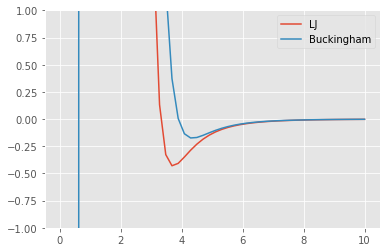

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# https://pubs.acs.org/doi/abs/10.1021/acs.inorgchem.7b00207
def phi_lj(r):
    eps = .4308
    sigma = 3.310
    return 4*eps*((sigma/r)**12 - (sigma/r)**6)

def phi_buckingham(r):
    A = 318418
    rho = .294276
    C = 2007.88
    return A * np.exp(-r/rho) - C/r**6

r = np.linspace(0.01, 10)
plt.plot(r, phi_lj(r), label='LJ');
plt.plot(r, phi_buckingham(r), label='Buckingham')
plt.ylim(-1,1)
plt.legend();

The [orbitals of real atoms](https://en.wikipedia.org/wiki/Atomic_orbital#Orbitals_table) are far more complicated than a radial function, and depend on other nearby atoms.

![](https://upload.wikimedia.org/wikipedia/commons/5/5f/Lysine_fisher_structure_and_3d_ball.svg)

## [Amber](http://ambermd.org/AmberModels.php) is a sophisticated force model evaluator

Amber force fields can be used in other molecular dynamics packages, such as GROMACS and NAMD.

The parameters in the force fields are estimated using optimization, [like this](https://pubs.acs.org/doi/abs/10.1021/acs.jctc.5b00255) (see [supplement](https://pubs.acs.org/doi/suppl/10.1021/acs.jctc.5b00255/suppl_file/ct5b00255_si_001.pdf) for coefficient values).  Some [recent](https://www.nature.com/articles/s41467-018-06169-2) [work](https://www.nature.com/articles/s41467-019-12875-2) seeks to use black-box machine learning methods (such as neural networks) to build multi-atom force models similar to the more explicit methods above.

## Anton-2

A special-purpose computer for molecular dynamics; winner of the [2014 Gordon Bell Prize](https://dl.acm.org/citation.cfm?id=2683599) at Supercomputing.

## Ab initio molecular dynamics

The prior methods were all about molecular dynamics that calculate forces based on positions of nuclei.  Ab initio methods solve for electronic structure (electrons are fields/waves for this purpose), which is far more expensive.  There are a hierarchy of models.  Some examples, in order of increasing expense:

* Density Functional Theory
* Coupled Cluster and Tensor Networks
* Quantum Monte-Carlo

Combined, these methods account for a large fraction of global supercomputing time.